In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import callbacks
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("/content/drive/MyDrive/Dicoding/subjects-questions.csv")
dataset.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


In [3]:
dataset.shape

(122519, 2)

In [4]:
category=dataset.Subject.value_counts()
category

Physics      38438
Chemistry    37767
Maths        33190
Biology      13124
Name: Subject, dtype: int64

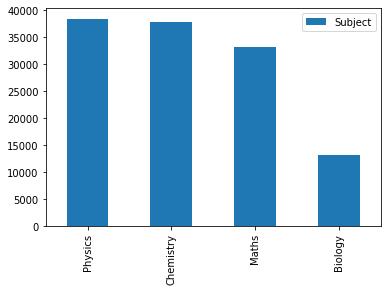

In [5]:
category=pd.DataFrame(category,columns=["Subject"])
category.plot.bar(y="Subject")

In [6]:
kategori=pd.get_dummies(dataset.Subject)
kategori

,Biology,Chemistry,Maths,Physics
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,1,0,0,0
4,0,0,0,1
...,...,...,...,...
122514,1,0,0,0
122515,0,0,0,1
122516,1,0,0,0
122517,0,0,0,1


In [7]:
dataset=pd.concat([dataset,kategori],axis=1)
dataset

,eng,Subject,Biology,Chemistry,Maths,Physics
0,An anti-forest measure is\nA. Afforestation\nB...,Biology,1,0,0,0
1,"Among the following organic acids, the acid pr...",Chemistry,0,1,0,0
2,If the area of two similar triangles are equal...,Maths,0,0,1,0
3,"In recent year, there has been a growing\nconc...",Biology,1,0,0,0
4,Which of the following statement\nregarding tr...,Physics,0,0,0,1
...,...,...,...,...,...,...
122514,Which of the following group of\ncharacters is...,Biology,1,0,0,0
122515,Light year is the\nA. light emitted by the sun...,Physics,0,0,0,1
122516,Member of Dipnoi are native of\nA. India.\nB. ...,Biology,1,0,0,0
122517,"In one average-life,\nA. half the active nucle...",Physics,0,0,0,1


In [8]:
label_text=dataset["eng"].values
label=dataset[["Biology",'Chemistry','Maths','Physics']].values

In [9]:
label

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [10]:
label_text

array(['An anti-forest measure is\nA. Afforestation\nB. Selective grazing\nC . Clearing forest\nD. Selective felling',
       'Among the following organic acids, the acid present in rancid butter is:\nA . pyruvic acid\nB. lactic acid\nc. butyric acid\nD. acetic acid',
       'If the area of two similar triangles are equal, then they are\nA . equilateral\nB. isosceles\nc. congruent\nD. not congruent',
       ...,
       'Member of Dipnoi are native of\nA. India.\nB. Africa and Australia.\nc. New Zealand\nD. None of the above',
       'In one average-life,\nA. half the active nuclei decay\nB. less than half the active nuclei decay.\nC. more than half the active nuclei decay.\nD. all the nuclei decay.',
       'State whether true or false.\nA magnetic field is a region around a magnet where magnetic lines of force\nact\nA. True\nB. False'],
      dtype=object)

In [11]:
text_latih,text_uji,label_latih,label_uji=train_test_split(label_text,label,test_size=0.2)

In [12]:
tokenizer = Tokenizer(num_words=98015, oov_token='x')
tokenizer.fit_on_texts(text_latih) 
tokenizer.fit_on_texts(text_uji)

sekuens_latih = tokenizer.texts_to_sequences(text_latih)
sekuens_test = tokenizer.texts_to_sequences(text_uji)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [13]:
class myCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      self.model.stop_training = True
      print("\nNilai Akurasi dan validasi telah mencapai 90%!")
callbacks = myCallback()

Pembuatan model

In [14]:
model=Sequential()
model.add(Embedding(input_dim=98015,output_dim=64))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation=('relu')))
model.add(Dense(4, activation=('softmax')))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          6272960   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 3

In [16]:
num_epochs = 100
history = model.fit(padded_latih, label_latih, epochs=num_epochs, validation_data=(padded_test, label_uji), batch_size=64,callbacks=[callbacks])

Epoch 1/100
1532/1532 [==============================] - 185s 110ms/step - loss: 0.8699 - accuracy: 0.6043 - val_loss: 0.3493 - val_accuracy: 0.8862
Epoch 2/100
1532/1532 [==============================] - 166s 108ms/step - loss: 0.3235 - accuracy: 0.9042 - val_loss: 0.2321 - val_accuracy: 0.9297
Epoch 3/100
1532/1532 [==============================] - 167s 109ms/step - loss: 0.2206 - accuracy: 0.9337 - val_loss: 0.3299 - val_accuracy: 0.8579
Epoch 4/100
1532/1532 [==============================] - 167s 109ms/step - loss: 0.2038 - accuracy: 0.9356 - val_loss: 0.2113 - val_accuracy: 0.9348

Nilai Akurasi dan validasi telah mencapai 90%!


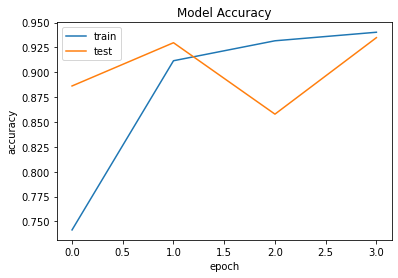

In [17]:
# plot of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Dicoding/model_acc.png')
plt.show()

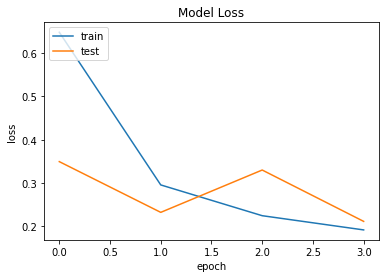

In [18]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/MyDrive/Dicoding/model_loss.png')
plt.show()

In [19]:
model.save("/content/drive/MyDrive/Dicoding/model/result.h5")